[[253 253 253 ... 252 252 252]
 [252 252 253 ... 253 253 253]
 [253 253 253 ... 253 253 253]
 ...
 [253 252 252 ... 253 253 253]
 [253 253 253 ... 253 253 252]
 [253 252 253 ... 253 253 253]]


(161, 61, 61)

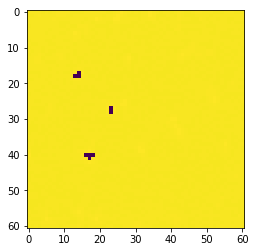

In [83]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.contrib import rnn
from skimage import feature
import numpy as np
import cv2 as cv
import mahotas as mt
import scipy as sc
import os
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import glob
import os
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
import tensorflow as tf
from sklearn.svm import LinearSVC
from skimage import feature
import numpy as np
from skimage import feature
import numpy as np
numPoints=24

# Data Dimension
num_input = 3 # MNIST data input (image shape: 28x28)
timesteps = num_input       # Timesteps
n_classes = 3   # Number of classes, one class per digit


radius=6
eps=1e-7
lung_image=[]
labels=[]
i=0
for lung_dir_path in glob.glob("/home/rishotics/somita/patches/*"):
    i=int(lung_dir_path[36:-5])
    
    if(i>=1 and i <=59):
        label=0
    elif(i>59 and i<=109):
        label=1
    else:
        label=2
    
    image=cv.imread(lung_dir_path,0)
    if(i==7):
        plt.imshow(image)
        print(image)
    #image2=cv.resize(image,(41,41))
    
    labels.append(label)
 #   labels.append(label)
    
    lung_image.append(image)
   # lung_image.append(image2)
    
lung_image=np.array(lung_image)
labels=np.array(labels)
lung_to_dict={i:k for k,i in enumerate(np.unique(labels))}
dict_to_id={i:k for k,i in lung_to_dict.items()}
label_id=np.array([lung_to_dict[x] for x in labels])
#lung_image=np.reshape(lung_image,(161*4,timesteps*timesteps))
lung_image.shape



In [85]:
radius=2
n_points = 8 * radius
lbp = feature.local_binary_pattern(lung_image[1], numPoints,radius, method="uniform")
lbp.shape

(61, 61)

(array([24.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([0.        , 0.04262295, 0.0852459 , 0.12786885, 0.1704918 ,
        0.21311475, 0.2557377 , 0.29836066, 0.34098361, 0.38360656,
        0.42622951]),
 <a list of 10 Patch objects>)

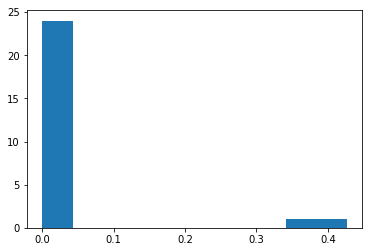

In [41]:
plt.hist(hist)

In [148]:


def LBP_features(image,radius):
    
    n_points = 8 * radius
    gray = image  
    lbp = feature.local_binary_pattern(gray, numPoints,radius, method="uniform")
  #  (hist, _) = np.histogram(lbp.ravel(),bins=np.arange(0, numPoints + 3),range=(0, numPoints + 2))
 
		# normalize the histogram
 #   hist = hist.astype("float")
  #  hist /= (hist.sum() + eps)
   # hist=np.array(hist)
    return lbp
j=0



X1=np.zeros((lung_image.shape[0],61,61))
X2=np.zeros((lung_image.shape[0],61,61))
for i in lung_image:
   # glcm_features=glcm(i)
   # gabor_features=gabor_feature(i)
    lbp_features1 = LBP_features(i,1)
    lbp_features2 = LBP_features(i,2)
    
    X1[j,:,:]=lbp_features1
    X2[j,:,:]=lbp_features2
    j=j+1

X=np.concatenate((X1,X2),axis=0)
y=np.concatenate((label_id,label_id),axis=0)
from keras.utils import to_categorical
X=np.reshape(X,(322,61,61,1))
y=np.reshape(y,(322,1))
X.shape,y.shape


((322, 61, 61, 1), (322, 1))

/home/rishotics/anaconda2/lib/python2.7/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


(322, 300)

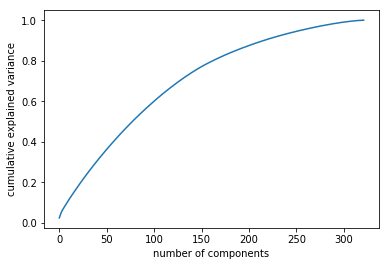

In [121]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
from sklearn.manifold import Isomap
model = Isomap(n_components=300)
X = model.fit_transform(X)
X.shape

In [160]:
x_train, x_valid, y_train, y_valid = train_test_split( X, y, test_size=0.10, random_state=42)
y_train = to_categorical(y_train)
y_valid=to_categorical(y_valid)
#y_train = to_categorical(y_train)
#y_valid=to_categorical(y_valid)
print(x_valid.shape)
print(y_valid.shape)


TypeError: Singleton array array(61) cannot be considered a valid collection.

In [150]:

import keras
from matplotlib import pyplot as plt
import numpy as np
import gzip
%matplotlib inline
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.optimizers import RMSprop
batch_size = 128
epochs = 50
inChannel = 1
x, y = 61, 61
input_img = Input(shape = (x,y, inChannel))
def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)

    #decoder
    conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #7 x 7 x 128
    up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
    conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
    up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
    return decoded
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [151]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 61, 61, 1)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 61, 61, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)       73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [158]:
from sklearn.model_selection import train_test_split

autoencoder_train = autoencoder.fit(x_train, y_train, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_valid, y_valid))


ValueError: Error when checking target: expected conv2d_18 to have 4 dimensions, but got array with shape (289, 1)

In [132]:
from sklearn.neighbors import KNeighborsClassifier
def KNN(n):
    neigh = KNeighborsClassifier(n_neighbors=n)
    neigh.fit(x_train,y_train)
#class_predicted=neigh.predict(select_X_test
    print("KNN with ")
    print(n)
    print(" nearest neightbours")
    print(" ")
    print("score= ", 100*neigh.score(x_valid, y_valid, sample_weight=None))
from sklearn.metrics import confusion_matrix
for i in range(1,100):
    KNN(i)

KNN with 
1
 nearest neightbours
 
('score= ', 93.84615384615384)
KNN with 
2
 nearest neightbours
 
('score= ', 60.0)
KNN with 
3
 nearest neightbours
 
('score= ', 32.30769230769231)
KNN with 
4
 nearest neightbours
 
('score= ', 32.30769230769231)
KNN with 
5
 nearest neightbours
 
('score= ', 32.30769230769231)
KNN with 
6
 nearest neightbours
 
('score= ', 32.30769230769231)
KNN with 
7
 nearest neightbours
 
('score= ', 32.30769230769231)
KNN with 
8
 nearest neightbours
 
('score= ', 30.76923076923077)
KNN with 
9
 nearest neightbours
 
('score= ', 30.76923076923077)
KNN with 
10
 nearest neightbours
 
('score= ', 32.30769230769231)
KNN with 
11
 nearest neightbours
 
('score= ', 32.30769230769231)
KNN with 
12
 nearest neightbours
 
('score= ', 32.30769230769231)
KNN with 
13
 nearest neightbours
 
('score= ', 32.30769230769231)
KNN with 
14
 nearest neightbours
 
('score= ', 32.30769230769231)
KNN with 
15
 nearest neightbours
 
('score= ', 30.76923076923077)
KNN with 
16
 nea

In [127]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=0.05,
                    hidden_layer_sizes=(256*2,), random_state=1)

clf.fit(x_train,y_train)
clf.score(x_valid, y_valid)*100

82.6086956521739